# 第5回課題

## 課題1

指定した値に辿り着くまで、二分的に値を絞り込んでいく。手続きとしては次のようになる。

1.引数として受け取った範囲の真ん中の点をmとして、それをシグモイド関数に代入する

2.出力された値と目標値の誤差がesplion（許容誤差）以内か判定する

3.許容誤差内ならmを出力、そうでなければ[a, m]もしくは[m, b]の範囲でsigmoid_inverseを呼び出す

4.1～3をmが出力されるまで繰り返す。





In [7]:
import numpy as np
epsilon=0.0001
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_inverse(y, a, b):
    m = (a + b) / 2.0

    f_m = sigmoid(m)

    if abs(f_m - y) < epsilon:
        return m

    elif f_m < y:
        return sigmoid_inverse(y, m, b)

    else:
        return sigmoid_inverse(y, a, m)


In [8]:
# テストケース
import pytest
assert 2.1972 == pytest.approx(sigmoid_inverse(0.9, -10, 10), epsilon)

## 課題2

リストが昇順で整理されているため、半開区間内で二分探査をすることができる。整数xと等しい要素を発見する関数binary_searchの手続きは次の通りになる。

1.l, rの中点mを計算する

2.インデックスmの要素とxが等しい場合、それをreturnする

3.インデックスmの要素とxが異なる場合、大小に応じて[m, r]もしくは[x, l]の範囲でbinary_searchを呼び出す

4.1～3を要素が見つかるまで行う。l >= rとなった場合、そのリストには要素が存在しないため、エラーとして-1を返す。


In [9]:
def binary_search(a, x, l, r):

    if l >= r:
        return -1

    mid = (l + r) // 2

    if a[mid] == x:
        return mid

    elif a[mid] > x:
        return binary_search(a, x, l, mid)

    else:
        return binary_search(a, x, mid + 1, r)

In [10]:
# テストケース
a=[1,3,5,7]
print(binary_search(a, 1, 0, len(a)), binary_search(a, 3, 0, len(a)),
       binary_search(a, 5, 0, len(a)), binary_search(a, 7, 0, len(a)),
      binary_search(a, 2, 0, len(a)))

b=[0,1,10,100,1000]
binary_search(b, 1, 0, len(a))

0 1 2 3 -1


1

## 課題3

コッホ曲線の作り方は次の通りである。（参照：https://judge.u-aizu.ac.jp/onlinejudge/description.jsp?id=ALDS1_5_C&lang=jp　）

1.与えられた線分 (p1,p2)を 3 等分する。

2.線分を 3等分する 2 点 s,tを頂点とする正三角形 (s,u,t)を作成する。

3.線分 (p1,s)、線分 (s,u)、線分 (u,t)、線分 (t,p2)に対して再帰的に同じ操作を繰り返す。

この操作を再帰的に実行する関数に必要なのは、1と2の機能である。

1の機能については難しくないのでコメントは割愛する。

2の機能については、回転行列を使って線分tsをsを中心に60°回転させた座標を取得すればよい。




In [11]:
import numpy as np

def koch(p1, p2, n):
    if n == 0:

        return [p1, p2]

    x0, y0 = p1
    x1, y1 = p2
    s = ((2 * x0 + x1) / 3, (2 * y0 + y1) / 3)
    t = ((x0 + 2 * x1) / 3, (y0 + 2 * y1) / 3)

    ux = (t[0] - s[0]) * np.cos(np.pi / 3) - (t[1] - s[1]) * np.sin(np.pi / 3) + s[0]
    uy = (t[0] - s[0]) * np.sin(np.pi / 3) + (t[1] - s[1]) * np.cos(np.pi / 3) + s[1]
    u = (ux, uy)

    k1 = koch(p1, s, n-1)
    k2 = koch(s, u, n-1)
    k3 = koch(u, t, n-1)
    k4 = koch(t, p2, n-1)

    result = k1[:-1] + k2[:-1] + k3[:-1] + k4
    return result

import matplotlib.pyplot as plt
import numpy as np

def plot_koch(a):

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

    a_ = np.array(a)
    xlist = a_[:, 0]
    ylist = a_[:, 1]

    ax.plot(xlist, ylist)
    ax.set_title('koch curve')

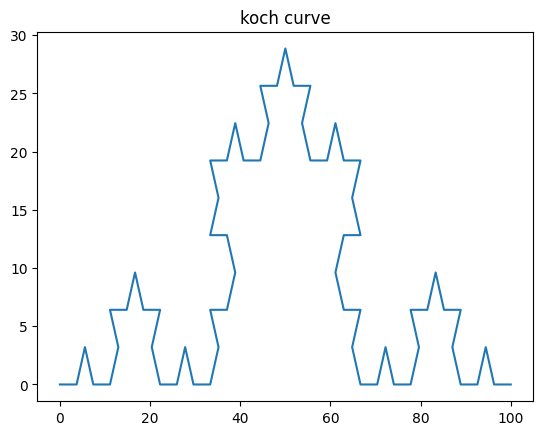

In [12]:
# テストケース
p1 = (0, 0)
p2 = (100, 0)
n = 3
points = koch(p1, p2, n)
plot_koch(points)

## 課題4

マージソート（昇順）の手続きは次の通りである。

1.与えられた配列が大きさ1になるまで分割する

2.隣どうしの配列でペアを作り、左から順に値を取り出し、大小比較して昇順に別のリストへ代入する。

3.1を行ったのち、2をリストが再構築されるまで再帰的に行う。

実装では、

merge関数で分割された二つのリストを大小比較＆統合し、mergesort関数内で与えられたリストを再帰的にサイズ1まで分割したあと、順にmerge関数に放り込むことで望んだ結果が得られる。







In [13]:
def mergesort(a):
    if len(a) <= 1:
        return a

    mid = len(a) // 2
    left = mergesort(a[:mid])
    right = mergesort(a[mid:])

    return merge(left, right)

def merge(left, right):
    sorted_array = []
    i = j = 0

    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            sorted_array.append(left[i])#この時点で、sorted_arrayの中身は処理済みの配列値がソートされて保存されている
            i += 1
        else:
            sorted_array.append(right[j])
            j += 1

    sorted_array.extend(left[i:])
    sorted_array.extend(right[j:])
    return sorted_array


In [14]:
# テストケース
mergesort([8,3,4,1,5,9,6,7,2])

[1, 2, 3, 4, 5, 6, 7, 8, 9]

## 課題5

マージソートの分割と比較の考え方を踏襲して、次のように実装することができる。

1.マージソートの手順で配列を分解・比較する。

2.比較の際、左部分配列の現在の要素が右部分配列の現在の要素より小さいか等しい場合、それを結果の配列に追加する。

左部分配列の現在の要素が右部分配列の現在の要素より大きい場合、この要素は右部分配列の全ての未処理の要素と逆順ペアを形成する。そのため、右配列部分の未処理の要素数を数え上げる。

3.2の手続きをソートが終わるまで再帰的に行う。

In [15]:
def mergesort_and_count(a):
    if len(a) <= 1:
        return a, 0

    mid = len(a) // 2
    left, left_inv_count = mergesort_and_count(a[:mid])
    right, right_inv_count = mergesort_and_count(a[mid:])

    sorted_array, merge_inv_count = merge_and_count(left, right)

    total_inv_count = left_inv_count + right_inv_count + merge_inv_count

    return sorted_array, total_inv_count

def merge_and_count(left, right):
    sorted_array = []
    i = j = 0
    inv_count = 0

    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            sorted_array.append(left[i])#この時点で、sorted_arrayの中身は処理済みの配列値がソートされて保存されている
            i += 1
        else:
            sorted_array.append(right[j])
            inv_count += len(left) - i
            j += 1

    sorted_array.extend(left[i:])
    sorted_array.extend(right[j:])

    return sorted_array, inv_count

In [16]:
# テストケース
a = [7, 3, 1, 2, 5, 7]
sorted_a, inv_count = mergesort_and_count(a)
print("Inversion count:", inv_count)

Inversion count: 6


## 課題6

ヒントを利用して実装する。

1.現在のトラックに積んだ重さ (初期値 0) とトラック台数 (初期値 1) を表す変数を作成する

2.各荷物について，現在のトラックに積んで最大積載量を超えないならそのまま積む (現在のトラッ
クに積んだ重さを増やす)/そうでなければ新しいトラックに積む (トラックの台数を増やして，現
在のトラックに積んだ重さをその荷物に設定)

3.最後に台数を K と比較し、台数がKを超えたら失敗とする

4.1～3の処理を、最大積載量を変化させながら繰り返し行う。最大積載量の初期値は色々とれるが、ここでは荷物の中で最も重い物(l)と、荷物の重さの合計(h)の中央値とする。

その積載量でOK関数がTrueを返した場合、より小さい積載量で再度トライする。積載量の減らし方には二分探索を使う。[l, h)の範囲を、h=(l+h)//2として絞り込む。

Falseを返した場合、積載量を増やす必要がある。つまり[l, h)のlを1づつ増やす。

これらの処理を、l < hとなるまで続ける。そのときの積載量が問題の解となる。



In [17]:
def min_sufficient_load(w, k):
    def ok(P):
        current_load = 0
        trucks_used = 1
        for weight in w:
            if current_load + weight <= P:
                current_load += weight
            else:
                trucks_used += 1
                current_load = weight
                if trucks_used > k:
                    return False
        return True

    l, h = max(w), sum(w)

    while l < h:
        mid = (l + h) // 2
        if ok(mid):
            h = mid#この時点で、hは試された中で最小の積載量
        else:
            l = mid + 1

    return h

In [18]:
# テストケース
w = [5, 3, 8, 1, 7, 3, 8, 9]
k = 2
print(min_sufficient_load(w, k))

24
